<a href="https://colab.research.google.com/github/PatriciaBonert/data-scientist/blob/master/Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

In [0]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## Características do DataFrame



In [0]:
#tamanho do df
df.shape

(303, 14)

In [0]:
df.shape[0]

303

In [0]:
#primeiras entradas e suas variáveis
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Não há dados sem preenchimento


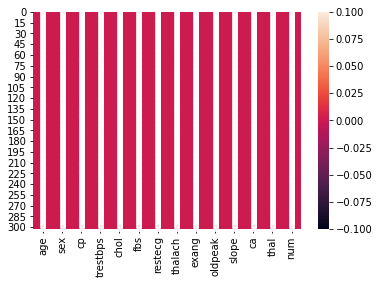

In [0]:
#dados faltantes
f,ax=plt.subplots()
sns.heatmap(df.isnull(),annot=True);

print('Não há dados sem preenchimento')

##Análise Exploratória de Dados

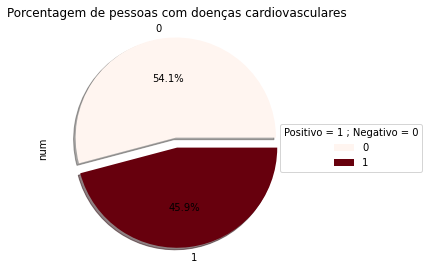

In [0]:
#plotar gráfico de pizza
f,ax = plt.subplots()
df.num.value_counts().plot(kind='pie', ax=ax, explode=[0.1,0], autopct='%1.1f%%',shadow=True, cmap='Reds')
plt.title('Porcentagem de pessoas com doenças cardiovasculares')
ax.legend(title='Positivo = 1 ; Negativo = 0', loc='center right', bbox_to_anchor=(1,0,0.5,1))
plt.tight_layout();


In [0]:
!pip install pywaffle -q
from pywaffle import Waffle;

     |████████████████████████████████| 532kB 3.5MB/s 


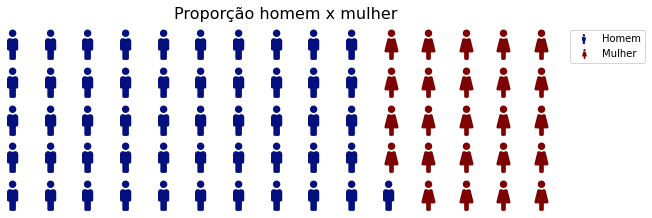

In [0]:
#plotar gráfico waffle
sex = df.sex.value_counts().to_dict()
f=plt.figure(FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#03107D", "#7D0303"),
                title={'label': 'Proporção homem x mulher', 'fontsize':16},
                values=sex,icons=('male','female'),
                labels=('Homem', 'Mulher'), icon_size=30,
                legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
                icon_legend=True,figsize=(10,6))
f.set_tight_layout(False)
plt.show();


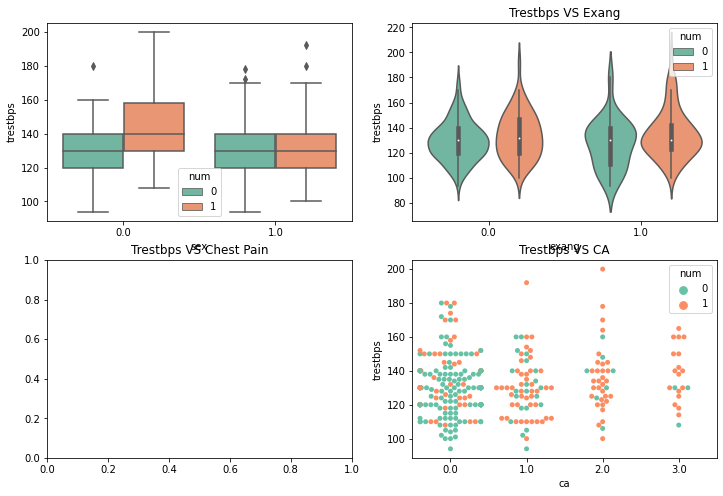

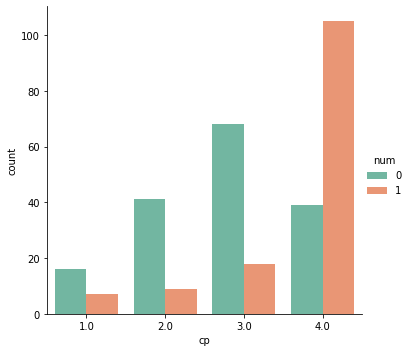

In [0]:
#análise exploratória de dados categóricos vs numéricos vs numéricos
f,ax=plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.boxplot(x='sex', y='trestbps', data=df, hue='num',ax=ax[0,0], palette='Set2')
ax[0,1].set_title('Trestbps VS Sex')
sns.factorplot('cp',kind='count',data=df, hue='num', ax=ax[1,0], palette='Set2')
ax[1,0].set_title('Trestbps VS Chest Pain')
sns.violinplot(x='exang', y='trestbps', data=df, hue='num',ax=ax[0,1],palette='Set2')
ax[0,1].set_title('Trestbps VS Exang')
sns.swarmplot(x='ca', y='trestbps', data=df, hue='num', ax=ax[1,1],palette='Set2')
ax[1,1].set_title('Trestbps VS CA');



**1.   Boxplots**
     
No gráfico 'Trestbps VS Sex' é inferido que no sexo feminino, há diferenças consideráveis quanto a pressão arterial em repouso nas mulheres que apresentam doença cardíaca, enquanto a comparação da pressão no sexo masculino é imperceptível. A pressão arterial mediana de 140 mm/Hg em repouso nas mulheres com doença cardíaca é a mesma que o valor do terceiro quartil para as que não apresentam doenças.

**2.   Factorplot**

Os tipos de dores toráxicas classificadas em: angina típica ou atípica, não cardíaca e assintomática. Segundo o gráfico 'Trestbps VS Chest Pain', a maioria dos casos com doenças cardíacas possuem dores assintomáticas.

**3.   Violinplot**

No gráfico 'Trestbps VS Exang' apresentam os dados de pessoas que não apresentam angina do lado esquerdo e as com angina à direita. A maioria com doença cardíca que apresenta angina, possuí pressão arterial em repouso entre 120 e 140 mm/Hg.

**4.   Swarmplot**

A distribuição no gráfico 'Trestbps VS CA nos indica uma maior concentração de indivíduos que não apresentam doença cardíaca tal qual a ausência de vasos principais coloridos por fluoroscopia.

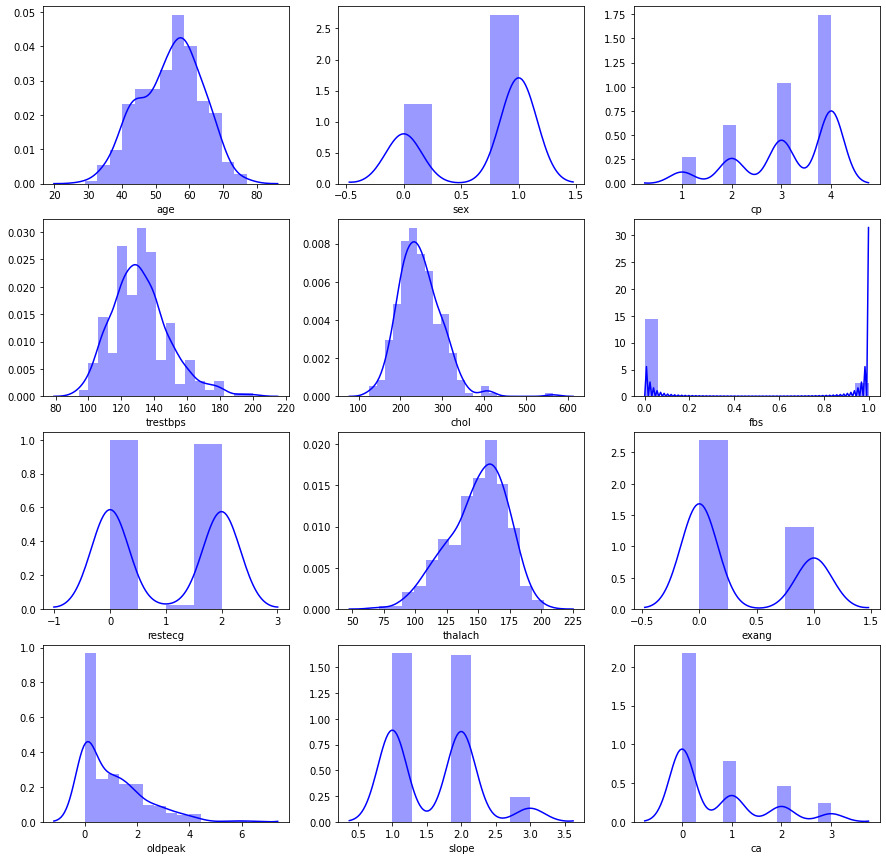

In [0]:
#distribuição de cada característica
f,ax=plt.subplots(nrows=4,ncols=3,figsize=(15,15))
for i in range(12):
  plt.subplot(4,3,i+1)
  sns.distplot(df.iloc[:,i],kde=True,color='blue')

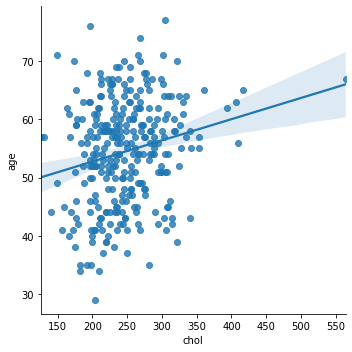

In [0]:
sns.lmplot(x="chol",y="age",data=df)
plt.show()

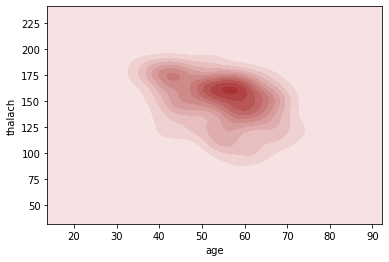

In [0]:
sns.kdeplot(df.age,df.thalach,shade=True,cut=5,color="brown")
plt.show()

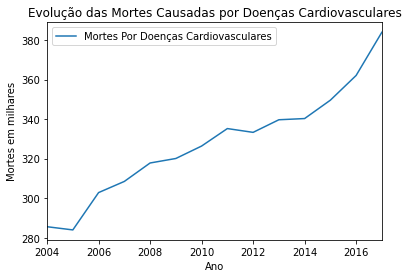

In [0]:
#plotar gráfico de crescimento de morte por doenças cardiovasculares

f, ax= plt.subplots()
df_brasil.plot(kind="line", x="ano",y="mortes_doencas_cardio", ax=ax)

ax.set_title("Evolução das Mortes Causadas por Doenças Cardiovasculares" )
ax.set_xlabel("Ano")
ax.set_ylabel("Mortes em milhares")
plt.legend().get_texts()[0].set_text('Mortes Por Doenças Cardiovasculares')
plt.tight_layout;